In [1]:
import os
print(os.getcwd())

/home/hieuhuynh/Projects/text-classifer


In [2]:
# get topic categories
with open(os.path.join('data', 'all-topics-strings.lc.txt')) as t_file:
    topic_lst = [category.strip().lower() for category in t_file.readlines()]
print(topic_lst)
print(len(topic_lst))

['acq', 'alum', 'austdlr', 'austral', 'barley', 'bfr', 'bop', 'can', 'carcass', 'castor-meal', 'castor-oil', 'castorseed', 'citruspulp', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'corn-oil', 'cornglutenfeed', 'cotton', 'cotton-meal', 'cotton-oil', 'cottonseed', 'cpi', 'cpu', 'crude', 'cruzado', 'dfl', 'dkr', 'dlr', 'dmk', 'drachma', 'earn', 'escudo', 'f-cattle', 'ffr', 'fishmeal', 'flaxseed', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-meal', 'groundnut-oil', 'heat', 'hk', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'inventories', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-meal', 'lin-oil', 'linseed', 'lit', 'livestock', 'lumber', 'lupin', 'meal-feed', 'mexpeso', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-meal', 'palm-oil', 'palmkernel', 'peseta', 'pet-chem', 'platinum', 'plywood', 'pork-belly', 'potato', 'propane', 'r

In [20]:
from bs4 import BeautifulSoup
import re
import xml.sax.saxutils as saxutils
import codecs
number_of_files = 22
_train_text_lst, _train_label_lst, _test_text_lst, _test_label_lst = [], [], [], []


def strip_tags(text):
    return re.sub('<[^<]+?>', '', text).strip()

for idx in range(number_of_files):
    file_path = os.path.join('data', 'reut2-0{}.sgm'.format('0{}'.format(idx) if idx < 10 else idx))
    print('processing file {}'.format(file_path))
    with codecs.open(file_path, 'r', encoding='UTF8', errors='replace') as f:        
        content = BeautifulSoup(f.read().lower(), 'html.parser')
        for doc in content('reuters'):            
            doc_id = doc['newid']
            doc_split = doc['lewissplit']            
            doc_topics = [strip_tags(str(topic)) for topic in doc.topics.contents]
            if not doc_topics:
                continue
            # to debug
            # print(doc_id, doc_split, doc_topics)
            # raise
            doc_body = saxutils.unescape(strip_tags(str(doc('text')[0].body)).replace('reuter\n&#3;', ''))            
            if doc_split == 'train':
                _train_text_lst.append(doc_body); _train_label_lst.append(doc_topics)
            elif doc_split == 'test':
                _test_text_lst.append(doc_body); _test_label_lst.append(doc_topics)
print('train: ', len(_train_text_lst))
print('test: ', len(_test_text_lst))

processing file data/reut2-000.sgm
processing file data/reut2-001.sgm
processing file data/reut2-002.sgm
processing file data/reut2-003.sgm
processing file data/reut2-004.sgm
processing file data/reut2-005.sgm
processing file data/reut2-006.sgm
processing file data/reut2-007.sgm
processing file data/reut2-008.sgm
processing file data/reut2-009.sgm
processing file data/reut2-010.sgm
processing file data/reut2-011.sgm
processing file data/reut2-012.sgm
processing file data/reut2-013.sgm
processing file data/reut2-014.sgm
processing file data/reut2-015.sgm
processing file data/reut2-016.sgm
processing file data/reut2-017.sgm
processing file data/reut2-018.sgm
processing file data/reut2-019.sgm
processing file data/reut2-020.sgm
processing file data/reut2-021.sgm
train:  7780
test:  3022


[('austral', 0), ('bfr', 0), ('castor-meal', 0), ('cotton-meal', 0), ('cottonseed', 0), ('drachma', 0), ('escudo', 0), ('f-cattle', 0), ('ffr', 0), ('flaxseed', 0), ('groundnut-meal', 0), ('hk', 0), ('lupin', 0), ('mexpeso', 0), ('palm-meal', 0), ('sfr', 0), ('silk', 0), ('singdlr', 0), ('tung', 0), ('tung-oil', 0), ('castor-oil', 1), ('castorseed', 1), ('citruspulp', 1), ('corn-oil', 1), ('cotton-oil', 1), ('cruzado', 1), ('dkr', 1), ('groundnut-oil', 1), ('lin-meal', 1), ('lin-oil', 1), ('lit', 1), ('nkr', 1), ('peseta', 1), ('rape-meal', 1), ('red-bean', 1), ('ringgit', 1), ('rupiah', 1), ('rye', 1), ('skr', 1), ('sun-meal', 1), ('copra-cake', 2), ('cornglutenfeed', 2), ('dfl', 2), ('fishmeal', 2), ('linseed', 2), ('naphtha', 2), ('nzdlr', 2), ('palladium', 2), ('palmkernel', 2), ('rand', 2), ('wool', 2), ('can', 3), ('cpu', 3), ('pork-belly', 3), ('potato', 3), ('propane', 3), ('saudriyal', 3), ('tapioca', 3), ('austdlr', 4), ('coconut', 4), ('coconut-oil', 4), ('jet', 4), ('plywoo

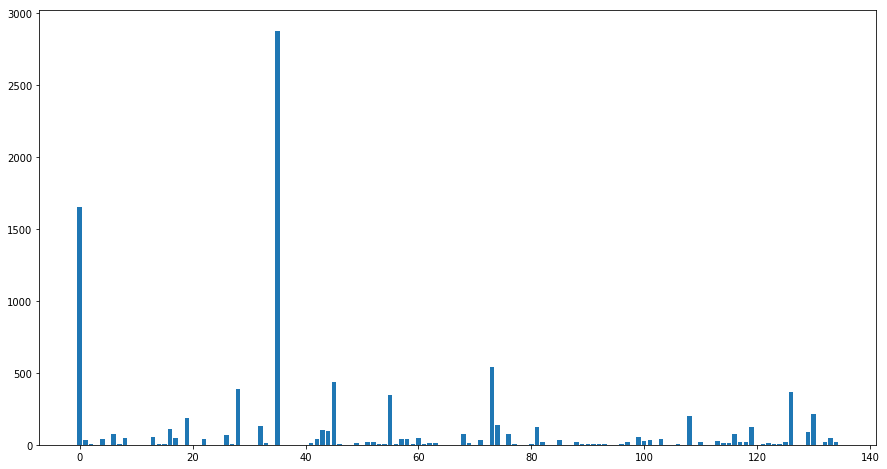

In [22]:
# plot distribution of labels
import matplotlib.pyplot as plt
import operator
train_topic_count = {topic: 0 for topic in topic_lst}
for labels in _train_label_lst:   # try with test_label_lst
    for t in labels:
        train_topic_count[t] += 1
sorted_topic_count = sorted(topic_count.items(), key=operator.itemgetter(1))
print(sorted_topic_count)
plt.figure(figsize=(15, 8))
plt.bar(range(len(topic_count)), list(topic_count.values()), align='center')
plt.show()

In [23]:
# remove classes with few occurences
topics_selected = [key for key in train_topic_count if train_topic_count[key] > 3]
def remove_minor_class(text_lst, _label_lst, topics_selected):
    label_lst = _label_lst.copy()
    idx_selected = []    
    for i, topics_sample in enumerate(label_lst):
        intersect = list(set(topics_sample) & set(topics_selected))
        if len(intersect) > 0:
            idx_selected.append(i)
            label_lst[i] = intersect
    return idx_selected, label_lst

# remove samples with few class occurences in training set
train_idx_selected, train_label_lst = remove_minor_class(_train_text_lst, _train_label_lst, topics_selected)
train_text_lst = [train_text_lst[i] for i in train_idx_selected]
train_label_lst = [train_label_lst[i] for i in train_idx_selected]

# remove samples with few class occurences in test set
test_idx_selected, test_label_lst = remove_minor_class(_test_text_lst, _test_label_lst, topics_selected)
test_text_lst = [test_text_lst[i] for i in test_idx_selected]
test_label_lst = [test_label_lst[i] for i in test_idx_selected]

In [24]:
train_idx_selected

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [26]:
# label transformer
from sklearn import preprocessing
label_binarizer = preprocessing.MultiLabelBinarizer(topics_selected)
label_binarizer.fit(train_label_lst)
# transform training label
y_train = label_binarizer.transform(train_label_lst)
print(y_train.shape)
# transform testing label
y_test = label_binarizer.transform(test_label_lst)
print(y_test.shape)

(7773, 77)
(3016, 77)


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train = vect.fit_transform(train_text_lst)
x_train.shape

(7773, 23545)

In [51]:
# model building + grid search + evaluation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn import linear_model, svm, naive_bayes, model_selection, metrics
class LRModel(object):
    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('cls', OneVsRestClassifier(linear_model.LogisticRegression()))
    ])
    parameters = {
        'vectorizer__max_df': (0.5, 0.75),
        'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
        "cls__estimator__C": [0.01, 0.1, 1],
    }
    
class NBModel(object):
    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('cls', OneVsRestClassifier(naive_bayes.MultinomialNB(
            fit_prior=True, class_prior=None))),
    ])
    parameters = {
        'vectorizer__max_df': (0.5, 0.75),
        'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'cls__estimator__alpha': (1e-2, 1e-3)
    }
    
class SVCModel(object):
    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('cls', OneVsRestClassifier(svm.LinearSVC())),
    ])
    parameters = {
        'vectorizer__max_df': (0.5, 0.75),
        'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'cls__estimator__C': [0.01, 0.1, 1]        
    }

In [65]:
from xgboost.sklearn import XGBClassifier
class XGBModel(object):
    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer(stop_words='english', max_features=10000)),
        ('cls', OneVsRestClassifier(XGBClassifier())),
    ])   
    parameters = {
        'vectorizer__max_df': (0.5, 0.75),
        'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],        
        'cls__estimator__max_depth': [3, 11],
        'cls__estimator__subsample': [0.25, 0.5, 0.75],
        'cls__estimator__colsample_bytree': [0.25, 0.5, 0.75]
    }

In [ ]:
mid = 'XGBModel'
pipeline, parameters = XGBModel.pipeline, XGBModel.parameters
grid_search = model_selection.GridSearchCV(pipeline, parameters, scoring='f1_micro', cv=None, n_jobs=4, verbose=10)
grid_search.fit(train_text_lst, y_train)

print("Best parameters set:")
print(grid_search.best_estimator_.steps)

print("Perform best classifier on test data:")
best_clf = grid_search.best_estimator_
predictions = best_clf.predict(test_text_lst)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1) 
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1) 
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1) 
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 


/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.786701531565185, total=  36.9s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7443130118289354, total=  36.2s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7713448149505313, total=  40.7s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, 

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))
/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.7894148341408871, total=  49.3s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3) 


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.6min


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.7722374429223744, total=  46.7s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.7474010578150647, total=  53.5s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.7939642324888226, total=  59.2s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7831166384021104, total=  38.6s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7666605470901414, total=  41.5s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2) 


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.6min


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.749005424954792, total=  50.5s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7415812591508052, total=  39.3s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 


/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.785137924563708, total=  45.2s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.7713972201901974, total=  55.9s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.7435242612185333, total=  58.0s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_dept

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.7774329012232974, total=  52.7s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1) 


/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.7874251497005987, total=  49.9s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  4.4min


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.7427113702623906, total=  50.9s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7858439201451904, total=  53.7s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.8002961317786415, total=  57.1s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cl

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7626570915619391, total=  48.4s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.7915993537964459, total= 1.1min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.8038891946431846, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls_

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  6.1min
/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.7882076324832701, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 


/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.786813982974099, total=  56.7s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.7630407690938223, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.8061674008810573, total= 1.3min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cl

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7559168925022584, total= 1.0min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.8014760147601476, total= 1.1min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.7890371438874865, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3,

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  9.0min
/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.7861146266497919, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7907564542336161, total=  55.1s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1) 


/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.8, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.7554671968190856, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 


/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.8019145802650959, total=  55.1s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7671184022824536, total= 1.0min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.8078889700511321, total= 1.1min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3,

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.7646112600536192, total= 1.1min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 12.0min


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.792154039949613, total= 1.4min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.8108305890962313, total= 1.3min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.7678920262830758, total= 1.3min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7931345980126469, total= 1.0min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2) 


/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.8027387120651369, total= 1.0min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7640086206896552, total= 1.1min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.8085808580858085, total= 1.1min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_dep

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.7584966732602051, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.7959073774905762, total= 1.3min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.8090959105079772, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_dep

[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 15.8min
/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=3, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.7637470893784704, total= 1.3min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7708448371065709, total=  47.4s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7912457912457913, total=  58.9s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_dep

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7511394712853237, total=  49.6s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.7842639593908629, total= 1.0min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.796883695047301, total= 1.1min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_dept

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.7433369843008396, total=  59.2s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.7762989972652689, total= 1.3min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.7991071428571429, total= 1.1min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_d

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7666055045871558, total= 1.0min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2) 


[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 18.8min


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7442286551850494, total=  47.1s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2) 


/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7921980495123782, total=  58.4s
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.773674588665448, total= 1.1min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.7916120576671034, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.7760102395319071, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.7931937172774869, total= 1.1min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1) 


/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.25, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.7462252137529561, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.779306549257017, total= 1.5min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7994801336799109, total= 1.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=1

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7612481857764877, total= 1.5min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.7948164146868251, total= 1.7min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.8090341535071612, total= 1.7min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11

[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 23.8min


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.7575757575757576, total= 1.7min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 


/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.7884615384615384, total= 2.0min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.8113276940051488, total= 1.6min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7816091954022988, total= 1.3min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.7662244532090355, total= 1.9min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.8014157973174365, total= 1.4min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2) 


/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7510456446626659, total= 1.3min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.7886915549111998, total= 1.5min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 


/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.8078981361874885, total= 1.8min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.7528049221860297, total= 1.6min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.7880770628862233, total= 1.7min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_dep

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.5, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3), score=0.757411424439624, total= 1.8min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 


[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 29.9min


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.785531603945926, total= 1.6min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7995533221663874, total= 1.7min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 1), score=0.7581556406050665, total= 1.5min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_dept

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.797260767705893, total= 2.0min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.8135219548043359, total= 1.9min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 2), score=0.7589204854193081, total= 1.8min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_dept

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))
/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.7689271618227486, total= 1.9min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7856099342585829, total= 1.8min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.5, vectorizer__ngram_range=(1, 3), score=0.8109902268117278, total= 2.1min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_

/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 1), score=0.7578409919766593, total= 1.7min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.8043719896257874, total= 1.8min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 3) 
[CV]  cls__estimator__colsample_bytree=0.25, cls__estimator__max_depth=11, cls__estimator__subsample=0.75, vectorizer__max_df=0.75, vectorizer__ngram_range=(1, 2), score=0.7909338168631007, total= 2.2min
[CV] cls__estimator__colsample_bytree=0.25, cls__estimator__ma

[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 36.6min
/home/hieuhuynh/Apps/anaconda3/envs/tf-1.7.0-cpu/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 30 is present in all training examples.
  str(classes[c]))


In [ ]:
report = metrics.classification_report(y_test, predictions, target_names=topics_selected)
print(report)
with(open(os.path.join(os.getcwd(), '{}.txt'.format(mid)), 'w')) as f:
    f.write(report)